## Student Achievement Analyzer

#### **1. Problem Statement**

This project examines how various factors including gender, ethnicity, parental education level, lunch, and test preparation course impact a student's performance (test results).

#### **2. Data Collection**

This dataset consist of 8 columns and 1000 rows

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
data = pd.read_csv('students_data.csv')

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

In [5]:
# checking for the missing values
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the data.

In [6]:
# checking for the duplicates
data.duplicated().sum()

np.int64(0)

There are no duplicates in the data.

In [7]:
# checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# descriptive statistics
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations from the numerical features: - 
- The mean of all the features (math_score, reading_score, writing_score) is nearly same. i.e., In the range of 66 - 69.16
- The standard deviation of these features are also very close ( in the range 14 - 15.19)
- Of the three features, the reading_score has the highest minimum value (17), followed by the writing_score (10), and finally, the math_score (0), which has the lowest value of all.

EDA

In [9]:
# categorical and numerical features
categorical_col = [col for col in data.columns if data[col].dtype == 'O']
numerical_col = [col for col in data.columns if data[col].dtype != 'O']


print("Numerical Columns: -", numerical_col)
print('Categorical Columns: -',categorical_col)

Numerical Columns: - ['math_score', 'reading_score', 'writing_score']
Categorical Columns: - ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding the 2 new columns of total scores and average to the dataset 

In [10]:
# calculating a new column having total score
data['total_score'] = data['math_score']+data['reading_score']+data['writing_score']

# calculating a new column having average_score
data['average_score'] = round(data['total_score']/3, 2)

In [11]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


### **Exploratory Analysis**

Creating a function for checking the distribution of Categorical Features

In [12]:
# Define color schemes
two_category_colors = ['#1f77b4', '#ff7f0e']  # Colors for two categories
multi_category_palette = sns.color_palette('Set2')  # Color palette for more categories

# Function to select colors based on unique values
def get_colors(column):
    num_unique = len(column.unique())
    if num_unique == 2:
        return two_category_colors
    else:
        return multi_category_palette[:num_unique]

# Updated pie_chart function with print statements
def pie_chart(col):
    values = data[col].value_counts()
    labels = list(values.index)  # Retrieve unique labels based on the column provided
    colors = get_colors(data[col])  # Get appropriate colors for the number of categories

    plt.figure(figsize=(4, 4))  # Set figure size
    plt.pie(x=values, labels=labels, autopct='%.2f%%', colors=colors)
    plt.title(f"Distribution of {col.title().replace('_',' ')}", fontweight='bold')
    plt.show()

### **1. Gender column**

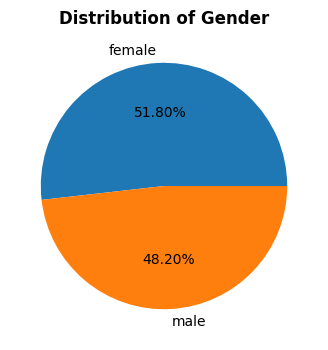

In [13]:
pie_chart('gender')

In [14]:
temp_df = data.groupby(by='gender').agg({
    'average_score':'mean',
    'math_score':'mean',
    'writing_score':'mean',
    'reading_score':'mean'
}).reset_index()

In [15]:
temp_df

,gender,average_score,math_score,writing_score,reading_score
0,female,69.569498,63.633205,72.467181,72.608108
1,male,65.837303,68.728216,63.311203,65.473029


#### Bivariate Analysis

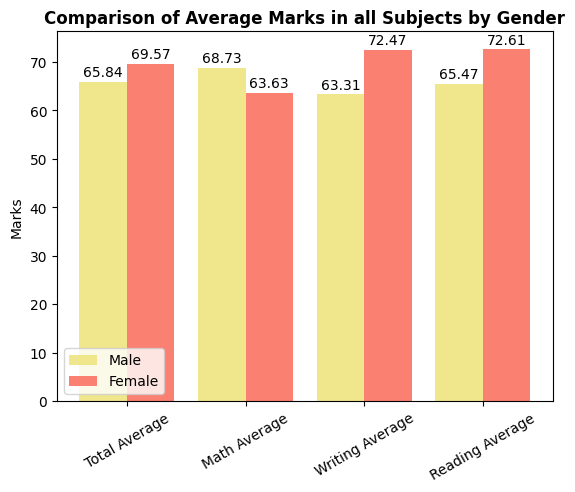

In [ ]:

# Select only numeric columns for aggregation
gender_group = data.select_dtypes(include='number').join(data['gender']).groupby('gender').mean()

# Define the labels and the scores for each gender
bars = ['Total Average', 'Math Average', 'Writing Average', 'Reading Average']

# Ensure 'average_score' and 'math_score' are valid column names in gender_group
female_scores = [gender_group['average_score'].iloc[0], gender_group['math_score'].iloc[0], gender_group['writing_score'].iloc[0], gender_group['reading_score'].iloc[0]]
male_scores = [gender_group['average_score'].iloc[1], gender_group['math_score'].iloc[1], gender_group['writing_score'].iloc[1], gender_group['reading_score'].iloc[1]]

# Create an array for the x-axis positions
X_axis = np.arange(len(bars))

# Plot the grouped bar chart
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='khaki')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='salmon')

# Add labels
for i, score in enumerate(male_scores):
    plt.text(X_axis[i] - 0.2, score + 0.5, f'{score:.2f}', ha='center', va='bottom')

for i, score in enumerate(female_scores):
    plt.text(X_axis[i] + 0.2, score + 0.5, f'{score:.2f}', ha='center', va='bottom')

# Set labels and title
plt.xticks(X_axis, bars)
plt.ylabel("Marks")
plt.title("Comparison of Average Marks in all Subjects by Gender", fontweight='bold')
plt.legend()


plt.xticks(rotation=30)
plt.show()


From the above bar chart it is observed that - 
- Females are tend to score higher in Reading and Writing, as they are leading males by 7.14 marks in reading and by 9.61 marks in Writing. 
- On the other hand, Males are having higher average score in maths (68.73) as compared to females (63.63).

### **2. Race Ethinicity Column** 

In [17]:
data['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

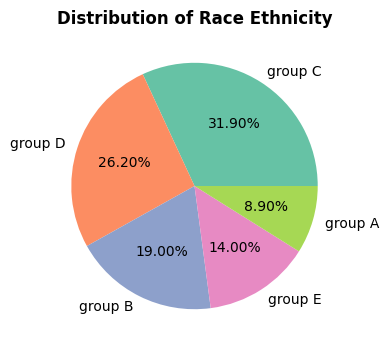

In [18]:
# visualizing the distribution of race_ethinicity
pie_chart('race_ethnicity')

From the above the visualizations, it is observed that 
- Most of the student belong to group C (31.90%) and group D (26.20%). 
- Group A has the minimum students (8.90%).

#### Bivariate Analysis

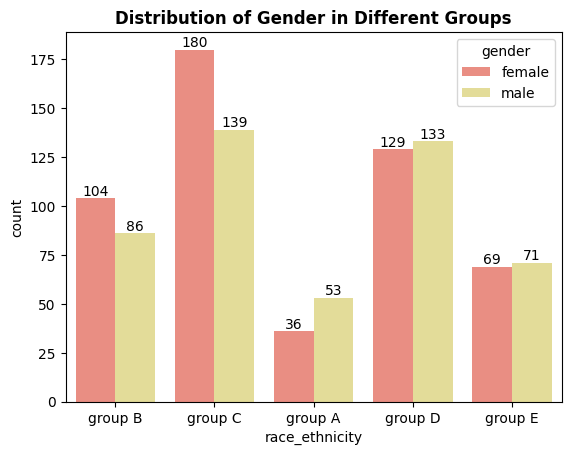

In [19]:
# Create the count plot
sns.countplot(data=data, x='race_ethnicity', hue='gender', palette=['salmon','khaki'])

# Add labels to each bar
for container in plt.gca().containers:
    # Go through each bar in the container
    for bar in container:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height,                             # Y position
            f'{int(height)}',                   # Text to display
            ha='center',                        # Center alignment
            va='bottom'                         # Bottom alignment, just above the bar
        )

plt.title('Distribution of Gender in Different Groups', fontweight='bold')
plt.show()

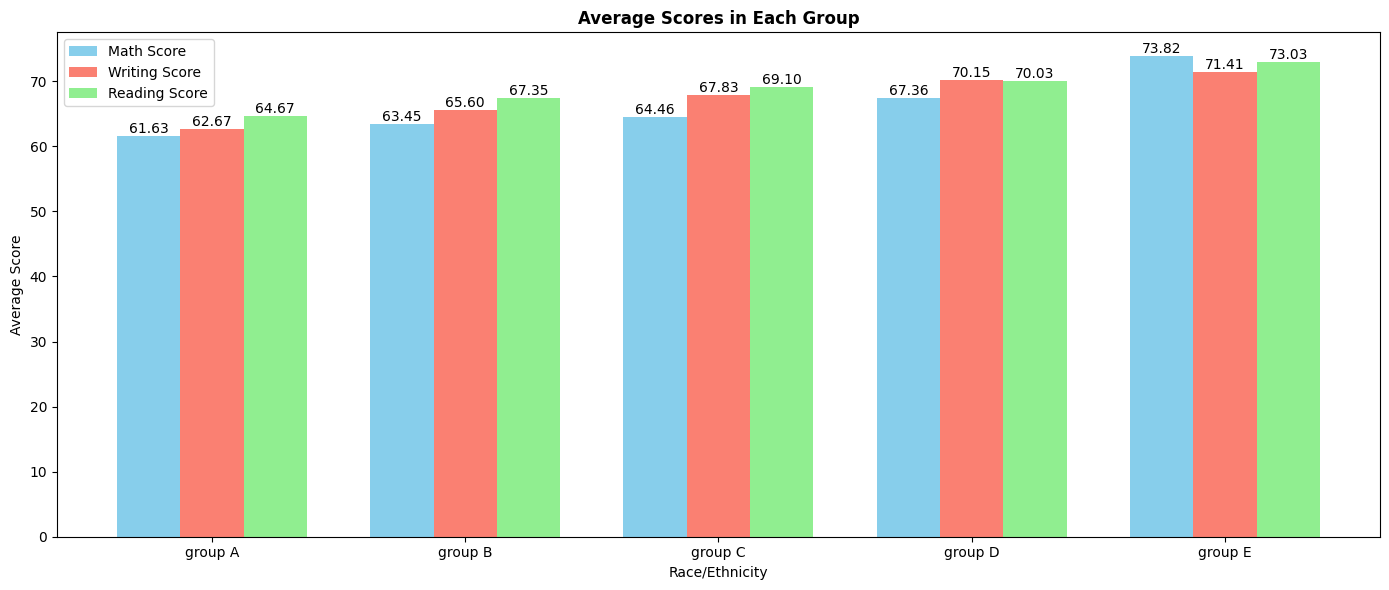

In [20]:
# calculating the mean scores for each subject in race_ethnicity
sections = data.groupby('race_ethnicity')[['math_score', 'writing_score', 'reading_score']].mean().reset_index()

# Define the x-axis positions for each category
x = np.arange(len(sections['race_ethnicity']))  
width = 0.25 

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

bars1 = ax.bar(x - width, sections['math_score'], width, label='Math Score', color='skyblue')
bars2 = ax.bar(x, sections['writing_score'], width, label='Writing Score', color='salmon')
bars3 = ax.bar(x + width, sections['reading_score'], width, label='Reading Score', color='lightgreen')

# Adding labels 
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel('Race/Ethnicity')
ax.set_ylabel('Average Score')
ax.set_title('Average Scores in Each Group', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(sections['race_ethnicity'])
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

- Group E is the highest scoring class out of all the groups/classes. Math is the subject where the highest results are attained, as evidenced by the fact that there are more males in group E (71) than girls (69).
- Group C, which has the largest population, has a higher writing and reading score since there are more women in it (180).

- Group D, the second most populous group, includes more males (133) than girls (129), but they also have higher average scores in writing (70.15) and reading (70.03) than in math (67.36). 
- The identical situation is seen in group A as well, where there are more men than women, but they also score higher in writing and reading.

- This indicates that achieving good arithmetic scores is not influenced by a person's gender.


### **3. Parental Level of Education Column**

In [21]:
data['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

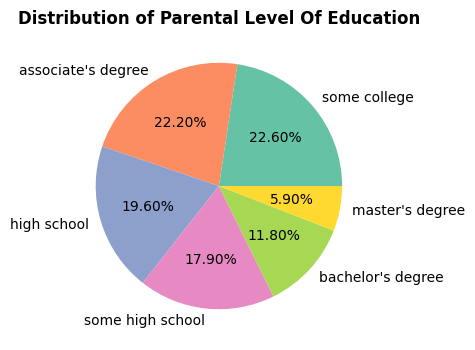

In [22]:
# visualization of education
pie_chart('parental_level_of_education')

The highest populated level of education is 'some college'(22.60 %) and associate's degree (22.20 %). 

#### Bivariate Analysis

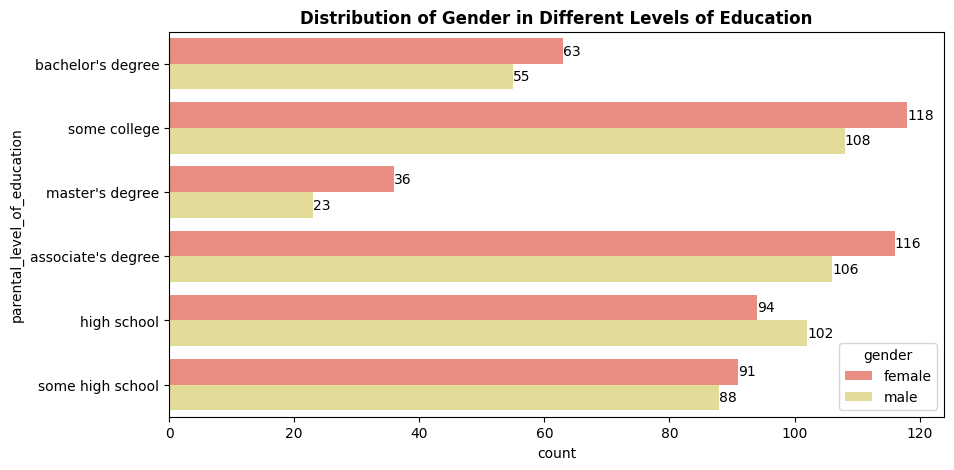

In [23]:
# Distribution of Gender in Different Levels of Education

# Create the count plot
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='parental_level_of_education', hue='gender', palette=['salmon','khaki'])

# Add labels to each bar
for container in plt.gca().containers:
    for bar in container:
        width = bar.get_width()  # Use width for horizontal bars
        plt.text(
            width,                       # X position (at the end of the bar)
            bar.get_y() + bar.get_height() / 2,  # Y position (centered on the bar)
            f'{int(width)}',             # Text to display
            ha='left',                   # Left alignment, slightly outside the bar
            va='center'                  # Center alignment on the y-axis
        )

plt.title('Distribution of Gender in Different Levels of Education', fontweight='bold')
plt.show()

The category 'some college' has highest number of females than males enrolled in followed by asscociate's degree.

### **4. Lunch Column**

In [24]:
data['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

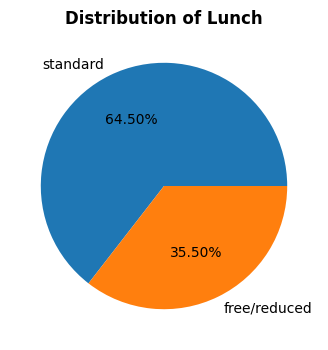

In [25]:
pie_chart('lunch')

64.50 % of the students are getting a standard tyoe of lunch.

In [26]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

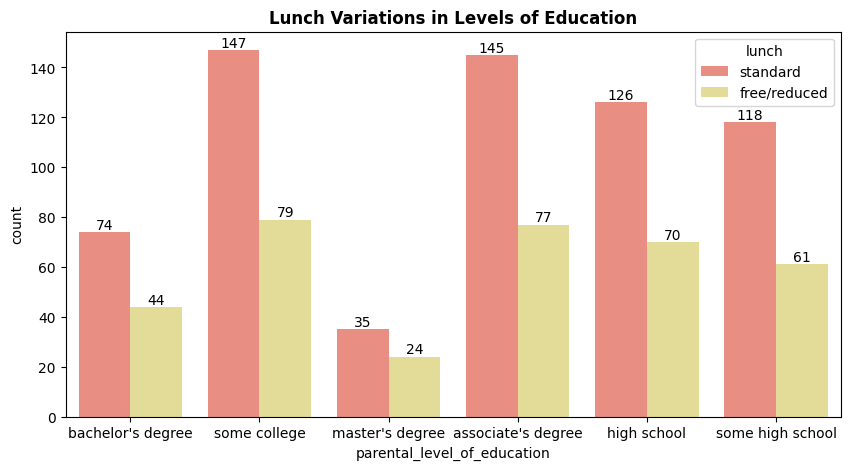

In [ ]:
plt.figure(figsize=(10,5))

sns.countplot(data=data, x='parental_level_of_education',hue='lunch',palette=['salmon', 'khaki'])

# Add labels to each bar
for container in plt.gca().containers:
    # Go through each bar in the container
    for bar in container:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height,                             # Y position
            f'{int(height)}',                   # Text to display
            ha='center',                        # Center alignment
            va='bottom'                         # Bottom alignment, just above the bar  
        )

plt.title('Lunch Variations in Levels of Education',fontweight='bold')
plt.show()

Among all levels of education students from 'some college' are getting highest amont of standard lunch (147) and free lunch (79). 

### **5. Test Preparation Course Column**

In [42]:
data['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

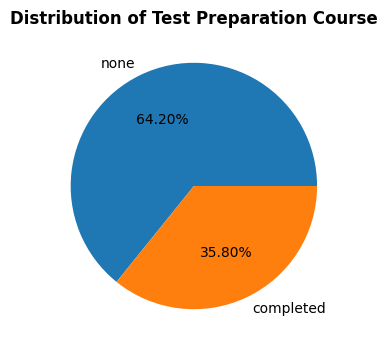

In [43]:
# visualization
pie_chart('test_preparation_course')

Only 35.80% of the students with available student data have finished preparing for the test.

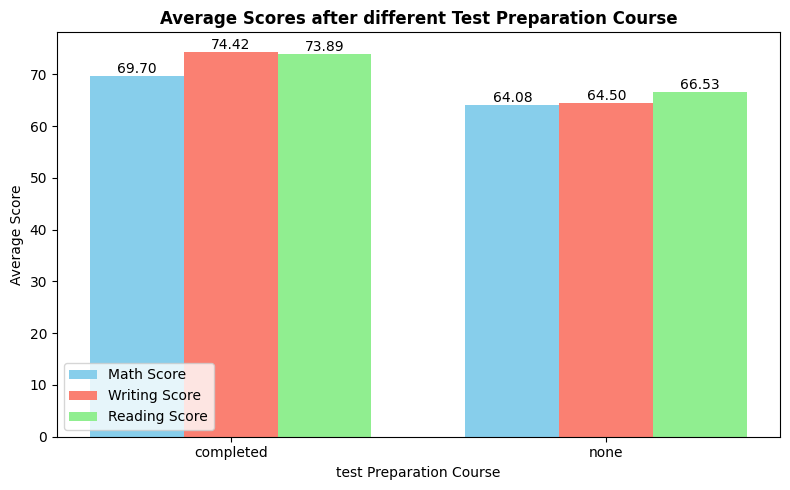

In [48]:
# calculating the mean scores for each subject in race_ethnicity
sections = data.groupby('test_preparation_course')[['math_score', 'writing_score', 'reading_score']].mean().reset_index()

# Define the x-axis positions for each category
x = np.arange(len(sections['test_preparation_course']))  
width = 0.25 

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(x - width, sections['math_score'], width, label='Math Score', color='skyblue')
bars2 = ax.bar(x, sections['writing_score'], width, label='Writing Score', color='salmon')
bars3 = ax.bar(x + width, sections['reading_score'], width, label='Reading Score', color='lightgreen')

# Adding labels 
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel('test Preparation Course')
ax.set_ylabel('Average Score')
ax.set_title('Average Scores after different Test Preparation Course', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(sections['test_preparation_course'])
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

It is evident from the following graphic that students who finished their exam preparation received superior grades across the board.

### **6. Math, Writing and Reading Score columns**

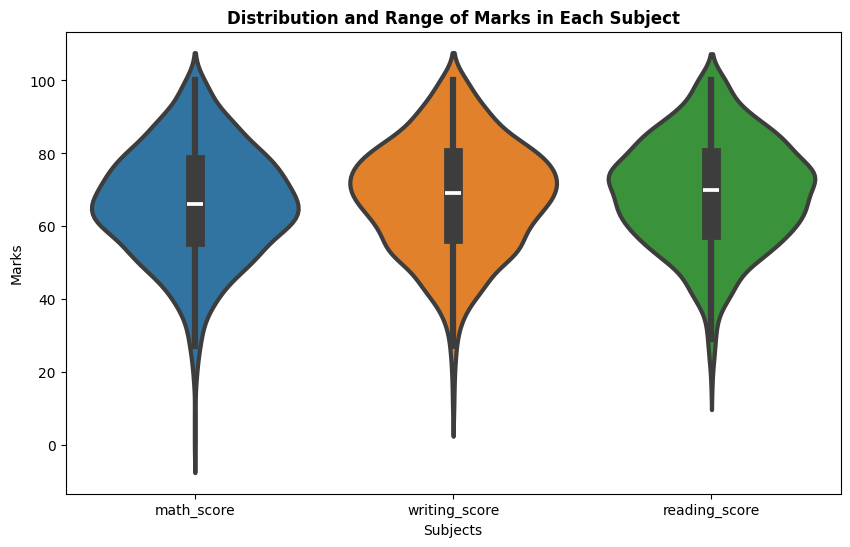

In [62]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data[['math_score', 'writing_score', 'reading_score']], linewidth=3)
plt.title('Distribution and Range of Marks in Each Subject', fontweight='bold')
plt.ylabel('Marks')
plt.xlabel('Subjects')
plt.show()

It is evident from the plot above that most students receive scores between 60 and 80 in math, while the majority receive scores between 50 and 80 in reading and writing.

In [67]:
# Calculating the students that have scored full marks in all the subjects
math_full_score = data[data['math_score']==100]['average_score'].count()
reading_full_score = data[data['reading_score']==100]['average_score'].count()
writing_full_score = data[data['writing_score']==100]['average_score'].count()

# printing the results
print(f'Number of students with full marks in Maths: {math_full_score}')
print(f'Number of students with full marks in Reading: {reading_full_score}')
print(f'Number of students with full marks in Writing: {writing_full_score}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


- Out of all the 3 subjects maimum students are scoring full marks in Reading followed by the Writing subject.
- There are only 7 students that are able to score full marks in Math.

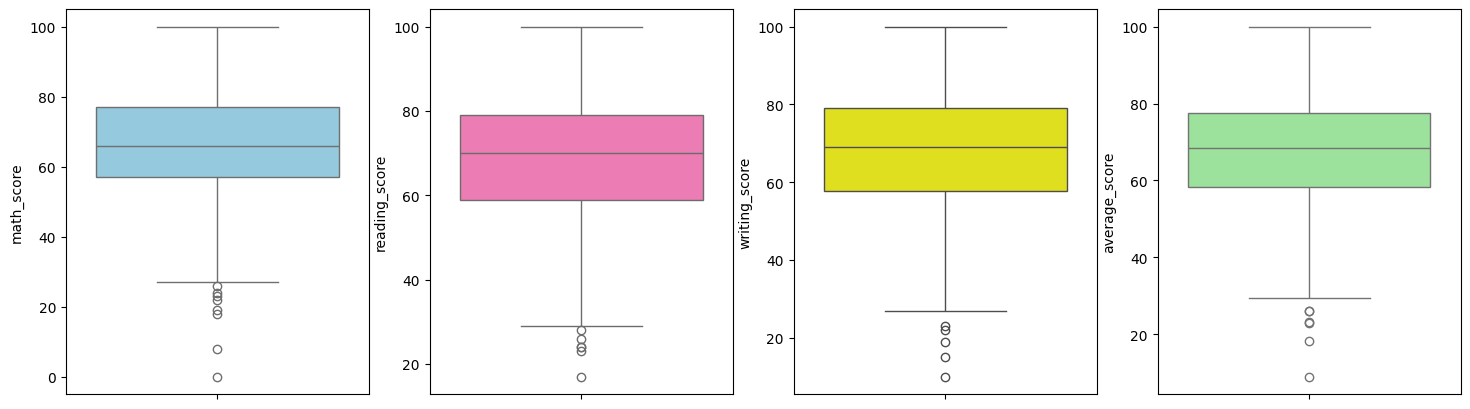

In [68]:
# Checking the presence of outliers in Math, reading and Writing score columns

plt.subplots(1,4,figsize=(18,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average_score'],color='lightgreen')
plt.show()

- From the above visual, we can observe that mostly outliers are the students that are scoring less than 25 marks in each subject.

In [69]:
reading_less_25 = data[data['reading_score'] <= 25]['average_score'].count()
writing_less_25 = data[data['writing_score'] <= 25]['average_score'].count()
math_less_25 = data[data['math_score'] <= 25]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_25}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_25}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_25}')

Number of students with less than 20 marks in Maths: 7
Number of students with less than 20 marks in Writing: 5
Number of students with less than 20 marks in Reading: 4


- Mostly students perform worst in Maths as compared to other subjects.